In [3]:
import pandas as pd

# Carregar os dados do Excel com o caminho correto
file_path = "data/proximidade1.csv"  # Note o "r" antes do caminho
df = pd.read_csv(file_path)
df.head()


,Carimbo de data/hora,Seu nome completo,Indique o nível de proximidade com Artur Sousa Araujo,Indique o nível de proximidade com Beatriz Guedes,Indique o nível de proximidade com \r\nBruno Martins Danziato,Indique o nível de proximidade com Eduardo Aronovich,Indique o nível de proximidade com Enrico Liberbaum,Indique o nível de proximidade com Franciele Taís,Indique o nível de proximidade com Gabriel Brana,Indique o nível de proximidade com Geovanna Felix,...,Indique o nível de proximidade com Lucas Coelho,Indique o nível de proximidade com Luis Felipe Alcantra,Indique o nível de proximidade com Luna Costa,Indique o nível de proximidade com Maria Antonia Botelho,Indique o nível de proximidade com Patrick Siles,Indique o nível de proximidade com Pedro Hajdu,Indique o nível de proximidade com Rafael Nunes,Indique o nível de proximidade com Rafaela Perlingeiro,Indique o nível de proximidade com Sarah Latouff,Indique o nível de proximidade com Victor Madsen
0,22/09/2024 14:37:47,Maria Botelho,3,1,3.0,NaN,4,1,1.0,5,...,5,5.0,3.0,NaN,2.0,1,1,3.0,4.0,4
1,22/09/2024 14:44:10,Lucas Coelho Silva,5,2,5.0,4.0,2,3,4.0,2,...,5,3.0,5.0,4.0,3.0,2,3,3.0,2.0,1
2,22/09/2024 14:47:43,João Pedro Jerônimo de Oliveira,3,1,4.0,4.0,1,1,2.0,1,...,5,1.0,5.0,1.0,3.0,3,1,1.0,1.0,1
3,22/09/2024 14:49:14,Gabriel Figueiredo Brana,3,1,5.0,4.0,2,5,NaN,4,...,5,4.0,3.0,2.0,4.0,2,5,1.0,1.0,3
4,22/09/2024 14:50:20,João Pedro Fortes Soares,3,2,5.0,5.0,2,3,4.0,4,...,5,3.0,5.0,1.0,5.0,3,2,5.0,3.0,2


In [4]:
# Limpar e organizar os dados
df_limpo = df.drop(columns=['Carimbo de data/hora']).fillna(0)

# Visualizar o DataFrame limpo para garantir que foi tratado corretamente
df_limpo.head()


,Seu nome completo,Indique o nível de proximidade com Artur Sousa Araujo,Indique o nível de proximidade com Beatriz Guedes,Indique o nível de proximidade com \r\nBruno Martins Danziato,Indique o nível de proximidade com Eduardo Aronovich,Indique o nível de proximidade com Enrico Liberbaum,Indique o nível de proximidade com Franciele Taís,Indique o nível de proximidade com Gabriel Brana,Indique o nível de proximidade com Geovanna Felix,Indique o nível de proximidade com Gustavo Tironi,...,Indique o nível de proximidade com Lucas Coelho,Indique o nível de proximidade com Luis Felipe Alcantra,Indique o nível de proximidade com Luna Costa,Indique o nível de proximidade com Maria Antonia Botelho,Indique o nível de proximidade com Patrick Siles,Indique o nível de proximidade com Pedro Hajdu,Indique o nível de proximidade com Rafael Nunes,Indique o nível de proximidade com Rafaela Perlingeiro,Indique o nível de proximidade com Sarah Latouff,Indique o nível de proximidade com Victor Madsen
0,Maria Botelho,3,1,3.0,0.0,4,1,1.0,5,4,...,5,5.0,3.0,0.0,2.0,1,1,3.0,4.0,4
1,Lucas Coelho Silva,5,2,5.0,4.0,2,3,4.0,2,5,...,5,3.0,5.0,4.0,3.0,2,3,3.0,2.0,1
2,João Pedro Jerônimo de Oliveira,3,1,4.0,4.0,1,1,2.0,1,4,...,5,1.0,5.0,1.0,3.0,3,1,1.0,1.0,1
3,Gabriel Figueiredo Brana,3,1,5.0,4.0,2,5,0.0,4,3,...,5,4.0,3.0,2.0,4.0,2,5,1.0,1.0,3
4,João Pedro Fortes Soares,3,2,5.0,5.0,2,3,4.0,4,4,...,5,3.0,5.0,1.0,5.0,3,2,5.0,3.0,2


In [5]:
import networkx as nx

# Criar o grafo
G = nx.Graph()

# Adicionar os nós (pessoas) no grafo
G.add_nodes_from(df_limpo['Seu nome completo'])

# Adicionar as arestas com os pesos baseados na proximidade
for i, linha in df_limpo.iterrows():
    pessoa = linha['Seu nome completo']
    for coluna in df_limpo.columns[2:]:  # Pulando a primeira coluna
        outro_membro = coluna.split("proximidade com ")[-1].strip()
        proximidade = linha[coluna]
        if proximidade > 0:
            G.add_edge(pessoa, outro_membro, weight=proximidade)


In [6]:
import plotly.graph_objects as go

# Filtrar as conexões com proximidade >= 4
G_filtrado = nx.Graph()
for u, v, data in G.edges(data=True):
    if data['weight'] >= 4:  # Apenas conexões mais fortes
        G_filtrado.add_edge(u, v, weight=data['weight'])

# Gerar o layout em 3D para a rede filtrada
pos_filtrado = nx.spring_layout(G_filtrado, dim=3, seed=42)

# Extrair as coordenadas 3D dos nós
x_nodes = [pos_filtrado[node][0] for node in G_filtrado.nodes()]
y_nodes = [pos_filtrado[node][1] for node in G_filtrado.nodes()]
z_nodes = [pos_filtrado[node][2] for node in G_filtrado.nodes()]

# Coordenadas das arestas
x_edges = []
y_edges = []
z_edges = []

for edge in G_filtrado.edges():
    x_edges.extend([pos_filtrado[edge[0]][0], pos_filtrado[edge[1]][0], None])
    y_edges.extend([pos_filtrado[edge[0]][1], pos_filtrado[edge[1]][1], None])
    z_edges.extend([pos_filtrado[edge[0]][2], pos_filtrado[edge[1]][2], None])

# Criar traçado dos nós
trace_nodes = go.Scatter3d(x=x_nodes, y=y_nodes, z=z_nodes,
                           mode='markers',
                           marker=dict(size=10, color='skyblue'),
                           text=list(G_filtrado.nodes()),  # Nome dos nós
                           hoverinfo='text')

# Criar traçado das arestas
trace_edges = go.Scatter3d(x=x_edges, y=y_edges, z=z_edges,
                           mode='lines',
                           line=dict(color='black', width=2),
                           hoverinfo='none')

# Configuração do layout
layout = go.Layout(showlegend=False)

# Gerar o gráfico interativo com as conexões filtradas
fig = go.Figure(data=[trace_edges, trace_nodes], layout=layout)
fig.show()


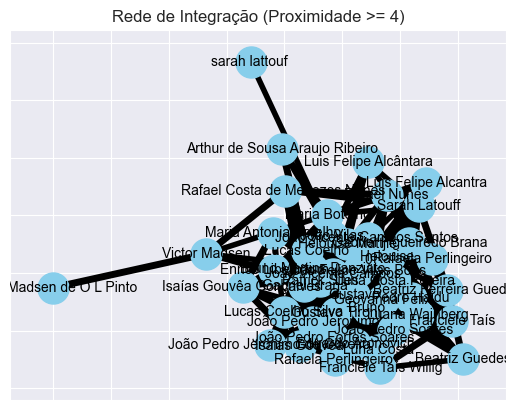

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Filtrar conexões com proximidade >= 4
G_filtrado = nx.Graph()
for u, v, data in G.edges(data=True):
    if data['weight'] >= 4:
        G_filtrado.add_edge(u, v, weight=data['weight'])

# Gerar layout 2D da rede
pos = nx.spring_layout(G_filtrado, seed=42)

# Desenhar os nós
nx.draw_networkx_nodes(G_filtrado, pos, node_size=500, node_color='skyblue')

# Desenhar as arestas com espessura baseada na proximidade
edges = G_filtrado.edges(data=True)
nx.draw_networkx_edges(G_filtrado, pos, edgelist=edges, width=[d['weight'] for u, v, d in edges])

# Adicionar rótulos
nx.draw_networkx_labels(G_filtrado, pos, font_size=10)

# Exibir o gráfico
plt.title("Rede de Integração (Proximidade >= 4)")
plt.show()


In [1]:
G_filtrado

NameError: name 'G_filtrado' is not defined

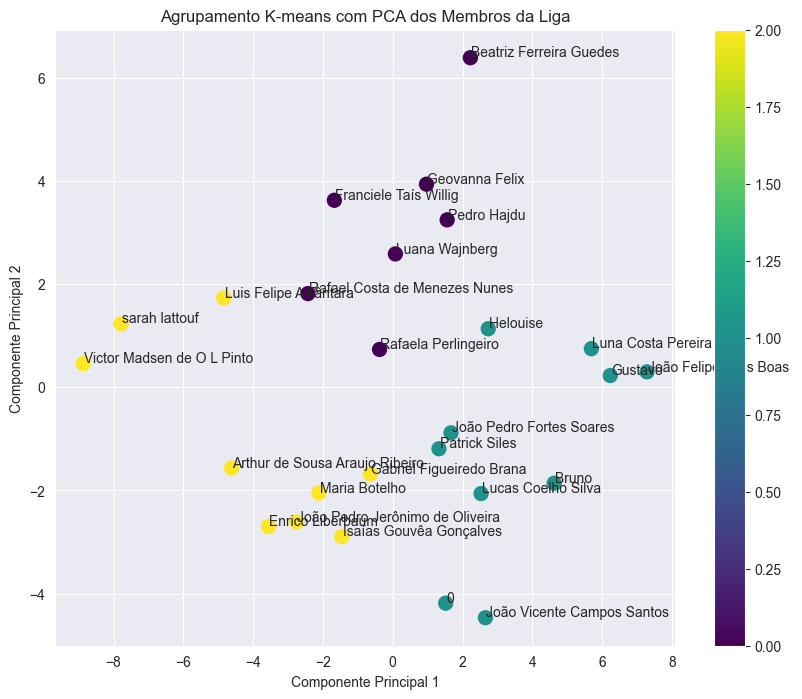

                  Seu nome completo  Cluster
0                                 0        1
1                     Maria Botelho        2
2                Lucas Coelho Silva        1
3   João Pedro Jerônimo de Oliveira        2
4          Gabriel Figueiredo Brana        2
5          João Pedro Fortes Soares        1
6              Rafaela Perlingeiro         0
7           João Felipe Vilas Boas         1
8             Luis Felipe Alcântara        2
9    Arthur de Sousa Araujo Ribeiro        2
10         Isaías Gouvêa Gonçalves         2
11                        Helouise         1
12   Rafael Costa de Menezes Nunes         0
13                            Bruno        1
14                   Geovanna Felix        0
15                    Patrick Siles        1
16       Victor Madsen de O L Pinto        2
17               Luna Costa Pereira        1
18          Beatriz Ferreira Guedes        0
19                   sarah lattouf         2
20                          Gustavo        1
21        

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Carregar os dados do Excel
file_path = r'C:\Users\seanc\Downloads\Pesquisa de Integração 24.2.xlsx'
df = pd.read_excel(file_path, sheet_name='Respostas ao formulário 1')

# Limpar e organizar os dados
df_limpo = df.drop(columns=['Carimbo de data/hora']).fillna(0)

# Transformar os dados em uma matriz de proximidade
matriz_proximidade = df_limpo.set_index('Seu nome completo')

# Reduzir as dimensões com PCA para 2 componentes
pca = PCA(n_components=2)
matriz_proximidade_2d = pca.fit_transform(matriz_proximidade)

# Aplicar o K-means clustering com 3 clusters (ajuste conforme necessário)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(matriz_proximidade_2d)

# Criar um gráfico de dispersão com as duas primeiras dimensões
plt.figure(figsize=(10, 8))
scatter = plt.scatter(matriz_proximidade_2d[:, 0], matriz_proximidade_2d[:, 1], 
                      c=clusters, cmap='viridis', s=100)

# Adicionar rótulos com ajuste para evitar sobreposição
for i, nome in enumerate(matriz_proximidade.index):
    plt.text(matriz_proximidade_2d[i, 0] + 0.02, matriz_proximidade_2d[i, 1] + 0.02, nome)

plt.title("Agrupamento K-means com PCA dos Membros da Liga")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(scatter)
plt.show()

# Exibir os clusters no console
df_limpo['Cluster'] = clusters
print(df_limpo[['Seu nome completo', 'Cluster']])
